# Lead Score Generation

### Problem Statement
An education company called X education which sells online courses to industry professionals is suffering from poor conversion rates to their courses. So, they want us to build a model which helps them identify their most potential leads ('Hot leads'), so that they can be targeted easily by the Sales team to increase their conversion rate.

### Analysis Approach
We'll perform **Logistic Regression** on the given data and generate the lead scores using the converted probabilities. 

#### Steps to be performed:
1. Reading and Understanding the data
2. Data Cleaning
3. Data Preparation
4. Model Building
5. Model Evaluation

In [1]:
# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
%matplotlib inline

# Pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_colwidth', -1)
pd.set_option('float_format','{:f}'.format)

# Loading the libraries for data preparation, model building and evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

## 1. Reading and Understanding the data

In [3]:
# Loading the data from csv file
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000000,0,0.000000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000000,674,2.500000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000000,1532,2.000000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000000,20.000000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000000,305,1.000000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000000,17.000000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000000,1428,1.000000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000000,18.000000,No,No,Modified


In [4]:
# Finding the shape of the dataset
leads.shape

(9240, 37)

The given dataset consists of **9240 rows and 37 columns**.

In [5]:
# Finding general info about the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that null values are present in some of the columns.

In [6]:
# Finding the statistics of the numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Finding the name of all the columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Finding the number of null values in each column of the dataset
leads.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article           

In [9]:
# Finding the number of unique values for each column
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                      5   
Lead Source                                      21  
Do Not Email                                     2   
Do Not Call                                      2   
Converted                                        2   
TotalVisits                                      41  
Total Time Spent on Website                      1731
Page Views Per Visit                             114 
Last Activity                                    17  
Country                                          38  
Specialization                                   19  
How did you hear about X Education               10  
What is your current occupation                  6   
What matters most to you in choosing a course    3   
Search                                           2   
Magazine                                         1   
Newspaper Article           

## 2. Data Cleaning
### 2.1. Dropping columns with too many unique values (ID columns)
We can see that `Prospect ID` and `Lead Number` have too many unique values, which will not be helpful in analysis. So, we drop them first.

In [10]:
# Dropping the 'Prospect ID' & 'Lead Number'
leads.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.000000,0,0.000000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Modified
1,API,Organic Search,No,No,0,5.000000,674,2.500000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.000000,1532,2.000000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000000,20.000000,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.000000,305,1.000000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000000,17.000000,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.000000,1428,1.000000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000000,18.000000,No,No,Modified


### 2.2. Dealing with the columns having 'Select'

In [11]:
# Finding what the columns with 'Select' in them
sel_cols = leads.loc[:, leads.isin(['Select']).nunique()>1].columns

print('The following columns have \'Select\' as a value:', *sel_cols, sep='\n')

The following columns have 'Select' as a value:
Specialization
How did you hear about X Education
Lead Profile
City


In [12]:
# Defining a function to find value counts in terms of percentage
def val_count(df,col):
    print(round(df[col].value_counts(dropna=False, normalize=True)*100,2))
    (df[col].value_counts(dropna=False, normalize=True)*100).plot.barh(title=col.upper())
    plt.show()

#### 2.2.1. Specialization

Select                              21.020000
NaN                                 15.560000
Finance Management                  10.560000
Human Resource Management           9.180000 
Marketing Management                9.070000 
Operations Management               5.440000 
Business Administration             4.360000 
IT Projects Management              3.960000 
Supply Chain Management             3.780000 
Banking, Investment And Insurance   3.660000 
Travel and Tourism                  2.200000 
Media and Advertising               2.200000 
International Business              1.930000 
Healthcare Management               1.720000 
Hospitality Management              1.230000 
E-COMMERCE                          1.210000 
Retail Management                   1.080000 
Rural and Agribusiness              0.790000 
E-Business                          0.620000 
Services Excellence                 0.430000 
Name: Specialization, dtype: float64


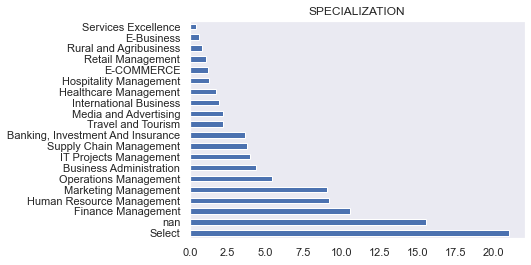

In [13]:
val_count(leads,'Specialization')

Management Specializations          46.030000
Others                              21.020000
NaN                                 15.560000
Business Administration             4.360000 
Banking, Investment And Insurance   3.660000 
Travel and Tourism                  2.200000 
Media and Advertising               2.200000 
International Business              1.930000 
E-Commerce                          1.830000 
Rural and Agribusiness              0.790000 
Services Excellence                 0.430000 
Name: Specialization, dtype: float64


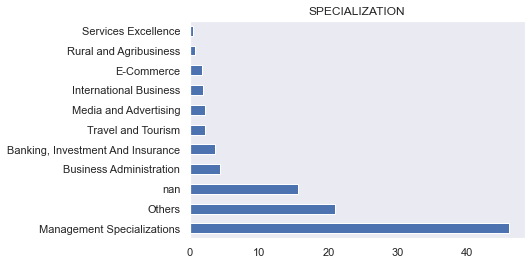

In [14]:
# Replacing 'Select' with 'Not Specified'
leads['Specialization'].replace('Select','Others', inplace=True)

# Combining 'Management' Specializations
leads['Specialization'].replace(['Supply Chain Management', 'IT Projects Management','Finance Management', 
                                 'Human Resource Management', 'Marketing Management', 'Operations Management', 
                                 'Retail Management', 'Hospitality Management', 'Healthcare Management'],
                               'Management Specializations', inplace=True)

# Combining E-COMMERCE and E-Business into E-Commerce
leads['Specialization'].replace(['E-COMMERCE', 'E-Business'],'E-Commerce', inplace=True)

val_count(leads,'Specialization')

#### 2.2.2. How did you hear about X Education

Select                  54.580000
NaN                     23.890000
Online Search           8.740000 
Word Of Mouth           3.770000 
Student of SomeSchool   3.350000 
Other                   2.010000 
Multiple Sources        1.650000 
Advertisements          0.760000 
Social Media            0.730000 
Email                   0.280000 
SMS                     0.250000 
Name: How did you hear about X Education, dtype: float64


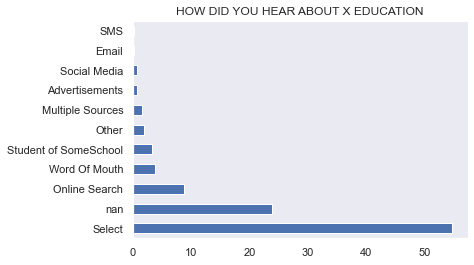

In [15]:
val_count(leads,'How did you hear about X Education')

NaN                     78.460000
Online Search           8.740000 
Word Of Mouth           3.770000 
Student of SomeSchool   3.350000 
Other                   2.010000 
Multiple Sources        1.650000 
Advertisements          0.760000 
Social Media            0.730000 
Email                   0.280000 
SMS                     0.250000 
Name: How did you hear about X Education, dtype: float64


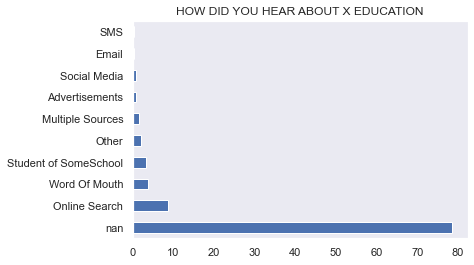

In [16]:
# In this column, 'Select' indicates missing value
leads['How did you hear about X Education'].replace('Select', np.nan, inplace=True)
val_count(leads,'How did you hear about X Education')

#### 2.2.3. Lead Profile

Select                        44.870000
NaN                           29.320000
Potential Lead                17.460000
Other Leads                   5.270000 
Student of SomeSchool         2.610000 
Lateral Student               0.260000 
Dual Specialization Student   0.220000 
Name: Lead Profile, dtype: float64


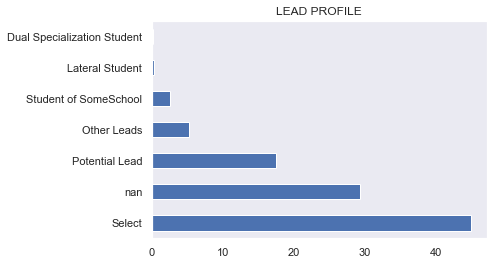

In [17]:
val_count(leads,'Lead Profile')

NaN                           74.190000
Potential Lead                17.460000
Other Leads                   5.270000 
Student of SomeSchool         2.610000 
Lateral Student               0.260000 
Dual Specialization Student   0.220000 
Name: Lead Profile, dtype: float64


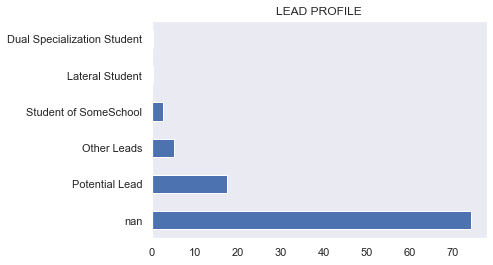

In [18]:
# In this column, 'Select' indicates missing value
leads['Lead Profile'].replace('Select', np.nan, inplace=True)
val_count(leads,'Lead Profile')

#### 2.2.4. City

Mumbai                        34.870000
Select                        24.340000
NaN                           15.370000
Thane & Outskirts             8.140000 
Other Cities                  7.420000 
Other Cities of Maharashtra   4.950000 
Other Metro Cities            4.110000 
Tier II Cities                0.800000 
Name: City, dtype: float64


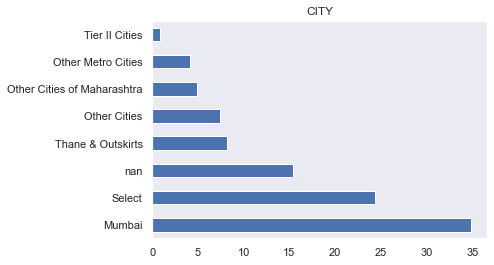

In [19]:
val_count(leads,'City')

NaN                           39.710000
Mumbai                        34.870000
Thane & Outskirts             8.140000 
Other Cities                  7.420000 
Other Cities of Maharashtra   4.950000 
Other Metro Cities            4.110000 
Tier II Cities                0.800000 
Name: City, dtype: float64


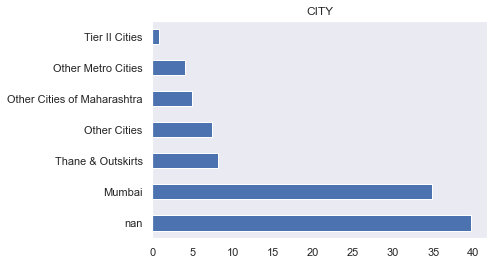

In [20]:
# In this column, 'Select' indicates missing value
leads['City'].replace('Select', np.nan, inplace=True)
val_count(leads,'City')

### 2.3. Dropping columns with high number of missing values

In [21]:
# Defining a function to find count, null, unique, datatype of each column in the dataframe
def df_attr(df):
    count = df.count()
    null = df.isnull().sum()
    null_perc = round(df.isnull().sum()/len(df.index)*100,4)
    unique = df.nunique()
    types = df.dtypes
    return pd.concat([count, null, null_perc, unique, types], axis = 1, 
                     keys=['COUNT','NULL','PERCENT','NUM_UNIQUE','DATATYPE']).sort_values(by='PERCENT',ascending=False)

In [22]:
leads_attr = df_attr(leads)
leads_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
How did you hear about X Education,1990,7250,78.463200,9,object
Lead Profile,2385,6855,74.188300,5,object
Lead Quality,4473,4767,51.590900,5,object
Asymmetrique Activity Score,5022,4218,45.649400,12,float64
Asymmetrique Profile Score,5022,4218,45.649400,10,float64
Asymmetrique Profile Index,5022,4218,45.649400,3,object
Asymmetrique Activity Index,5022,4218,45.649400,3,object
City,5571,3669,39.707800,6,object
Tags,5887,3353,36.287900,26,object
What matters most to you in choosing a course,6531,2709,29.318200,3,object


In [23]:
# Dropping the columns with null percentage more than 35%
drop_cols = list(leads_attr.loc[leads_attr.PERCENT > 35].index)

leads.drop(drop_cols, axis=1, inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [24]:
leads_attr = df_attr(leads)
leads_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
What matters most to you in choosing a course,6531,2709,29.318200,3,object
What is your current occupation,6550,2690,29.112600,6,object
Country,6779,2461,26.634200,38,object
Specialization,7802,1438,15.562800,10,object
TotalVisits,9103,137,1.482700,41,float64
Page Views Per Visit,9103,137,1.482700,114,float64
Last Activity,9137,103,1.114700,17,object
Lead Source,9204,36,0.389600,21,object
Through Recommendations,9240,0,0.000000,2,object
Receive More Updates About Our Courses,9240,0,0.000000,1,object


### 2.4. Dealing with highly skewed data

In [25]:
# Defining a function to plot count plot 
def count_plot(df, col, size=(6,4)):
    plt.figure(figsize=size)
    sns.countplot(y=col, hue='Converted', data=df)
    plt.show()

We'll first deal with the columns with binary values like 'Yes' and 'No' and the skewed columns that have more than 90% of their values in a single category. These kind of skewed columns will not be helpful in our analysis.

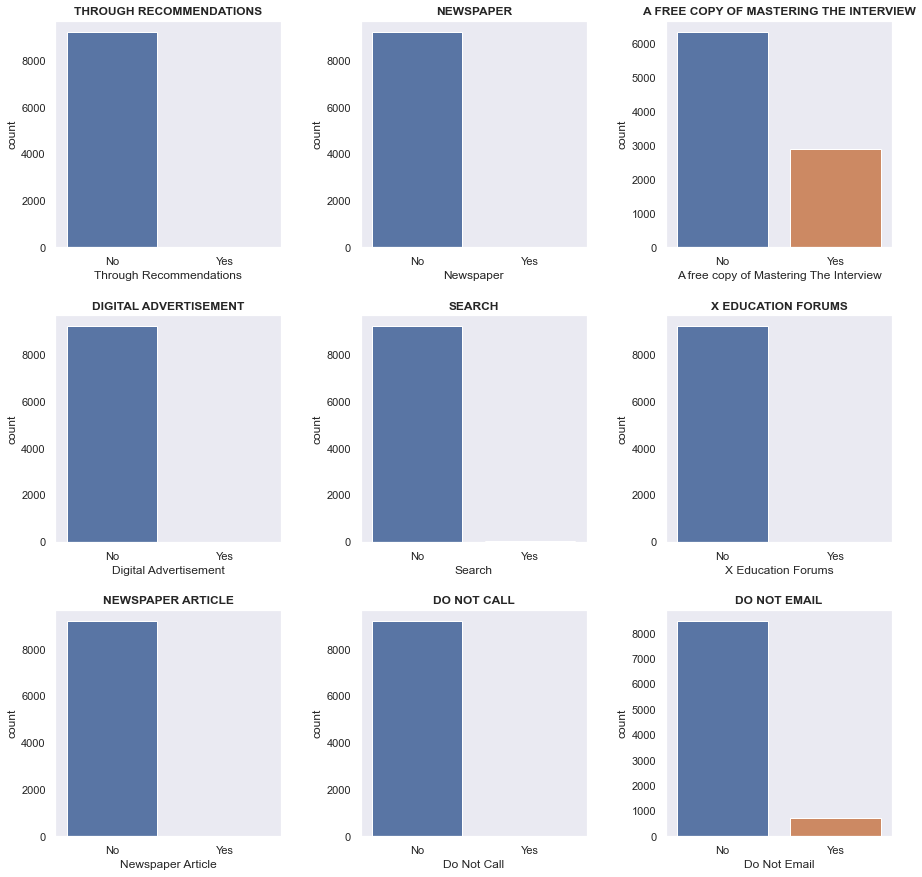

In [26]:
# Finding the columns with binary values and plotting their distribution
binary_cols = leads_attr.loc[(leads_attr.NUM_UNIQUE==2) & (leads_attr.DATATYPE=='object')].index

plt.figure(figsize = (15,15))
for i,col in enumerate(binary_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=leads)
    plt.title(col.upper(), weight='bold')

plt.subplots_adjust(wspace=0.35, hspace = 0.3)

From the above plots, we can see that nearly all the columns except `A free copy of Mastering The Interview` has more than 90% values as 'No'. These columns will not be helpful in our analysis and hence we need to remove them.

In [27]:
# Finding the columns with highly skewed distribution i.e., > 90% in one category
skew_cols = []
for col in leads.columns:
    if max(leads[col].value_counts(normalize=True))*100 > 90:
            skew_cols.append(col)

print('The following columns are highly skewed:',*skew_cols, sep='\n')

The following columns are highly skewed:
Do Not Email
Do Not Call
Country
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


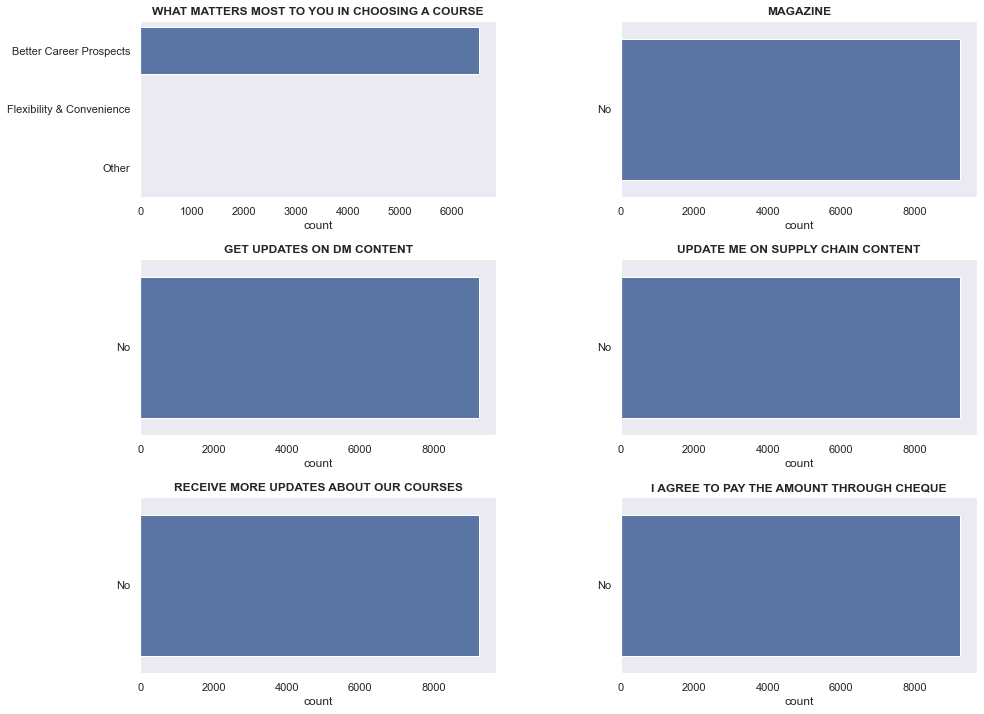

In [28]:
# Plotting the distribution of columns which are not plotted above
pl_cols = ['What matters most to you in choosing a course', 'Magazine', 'Get updates on DM Content', 
          'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 
           'I agree to pay the amount through cheque']

plt.figure(figsize = (15,12))

for i,col in enumerate(pl_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=col, data=leads)
    plt.title(col.upper(), weight='bold')
    plt.ylabel(None)

plt.subplots_adjust(wspace=0.35, hspace=0.35)

From the above plots, we can see that these variables have nearly 100% of their values in a single category.

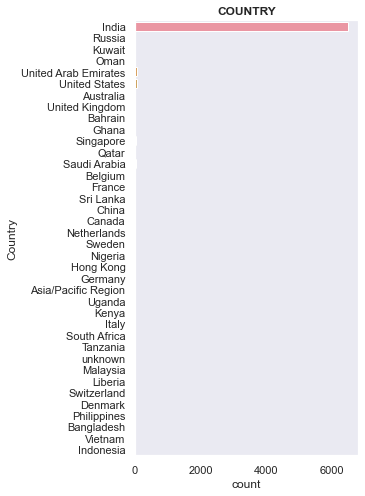

In [29]:
# Plotting the distribution of 'Country'
plt.figure(figsize=(4,8))
sns.countplot(y='Country', data=leads);
plt.title('COUNTRY', weight='bold');

More than 99% of the leads have their `Country` as India, so it won't help us much in classifying the leads. Maybe, the target audience of this campaign were Indians only.

In [30]:
# Dropping highly skewed columns
leads.drop(skew_cols, axis=1, inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          7802 non-null   object 
 8   What is your current occupation         6550 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [31]:
leads_attr = df_attr(leads)
leads_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
What is your current occupation,6550,2690,29.112600,6,object
Specialization,7802,1438,15.562800,10,object
TotalVisits,9103,137,1.482700,41,float64
Page Views Per Visit,9103,137,1.482700,114,float64
Last Activity,9137,103,1.114700,17,object
Lead Source,9204,36,0.389600,21,object
Lead Origin,9240,0,0.000000,5,object
Converted,9240,0,0.000000,2,int64
Total Time Spent on Website,9240,0,0.000000,1731,int64
A free copy of Mastering The Interview,9240,0,0.000000,2,object


### 2.5. Dealing with missing data
#### 2.5.1. What is your current occupation

Unemployed             60.610000
NaN                    29.110000
Working Professional   7.640000 
Student                2.270000 
Other                  0.170000 
Housewife              0.110000 
Businessman            0.090000 
Name: What is your current occupation, dtype: float64


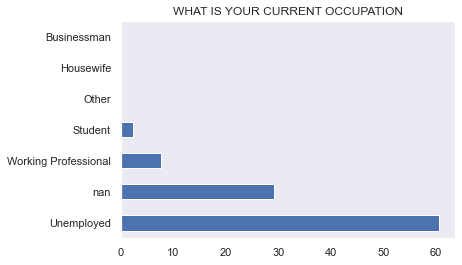

In [32]:
val_count(leads, 'What is your current occupation')

We'll impute the missing values with mode i.e., **Unemployed** in this case.

Unemployed             89.720000
Working Professional   7.640000 
Student                2.270000 
Other                  0.170000 
Housewife              0.110000 
Businessman            0.090000 
Name: What is your current occupation, dtype: float64


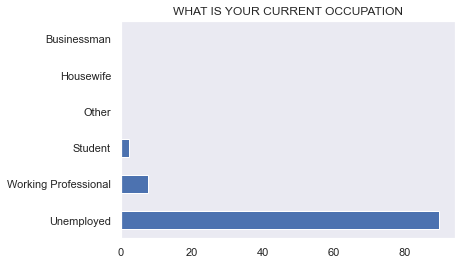

In [33]:
# Filling the nan values with 'Unemployed'
leads['What is your current occupation'].fillna('Unemployed', inplace=True)
val_count(leads, 'What is your current occupation')

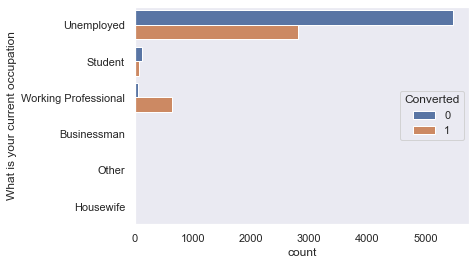

In [34]:
count_plot(leads, 'What is your current occupation')

From the above plot, we can see that the conversion rate is very good for **Working Professional** and they need to be targeted to enhance the conversion rate.

#### 2.5.2. Specialization

Management Specializations          46.030000
Others                              21.020000
NaN                                 15.560000
Business Administration             4.360000 
Banking, Investment And Insurance   3.660000 
Travel and Tourism                  2.200000 
Media and Advertising               2.200000 
International Business              1.930000 
E-Commerce                          1.830000 
Rural and Agribusiness              0.790000 
Services Excellence                 0.430000 
Name: Specialization, dtype: float64


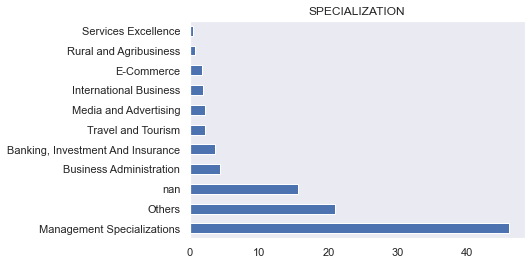

In [35]:
val_count(leads, 'Specialization')

We'll replace the null values with **Others**.

Management Specializations          46.030000
Others                              36.580000
Business Administration             4.360000 
Banking, Investment And Insurance   3.660000 
Travel and Tourism                  2.200000 
Media and Advertising               2.200000 
International Business              1.930000 
E-Commerce                          1.830000 
Rural and Agribusiness              0.790000 
Services Excellence                 0.430000 
Name: Specialization, dtype: float64


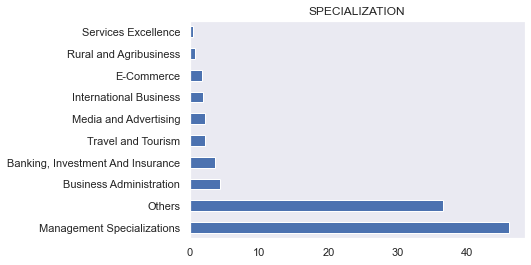

In [36]:
leads['Specialization'].fillna('Others', inplace=True)
val_count(leads, 'Specialization')

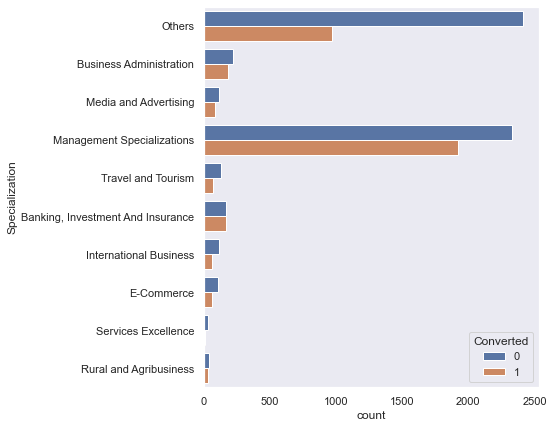

In [37]:
count_plot(leads, 'Specialization', (6,7))

Here, we can see specializations like management specializations, business administration & banking, investment and insurance have better conversion rate than other specializations.

#### 2.5.3. Last Activity

Email Opened                   37.200000
SMS Sent                       29.710000
Olark Chat Conversation        10.530000
Page Visited on Website        6.930000 
Converted to Lead              4.630000 
Email Bounced                  3.530000 
Email Link Clicked             2.890000 
Form Submitted on Website      1.260000 
NaN                            1.110000 
Unreachable                    1.010000 
Unsubscribed                   0.660000 
Had a Phone Conversation       0.320000 
Approached upfront             0.100000 
View in browser link Clicked   0.060000 
Email Marked Spam              0.020000 
Email Received                 0.020000 
Visited Booth in Tradeshow     0.010000 
Resubscribed to emails         0.010000 
Name: Last Activity, dtype: float64


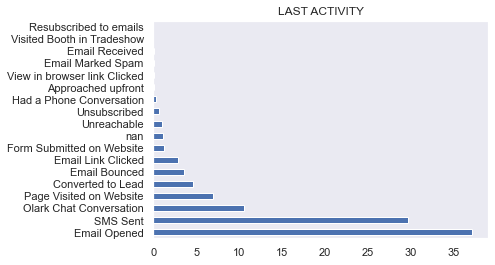

In [38]:
val_count(leads, 'Last Activity')

We'll fill the null values with the mode, **Email Opened**.

Email Opened                   38.310000
SMS Sent                       29.710000
Olark Chat Conversation        10.530000
Page Visited on Website        6.930000 
Converted to Lead              4.630000 
Email Bounced                  3.530000 
Email Link Clicked             2.890000 
Form Submitted on Website      1.260000 
Unreachable                    1.010000 
Unsubscribed                   0.660000 
Had a Phone Conversation       0.320000 
Approached upfront             0.100000 
View in browser link Clicked   0.060000 
Email Marked Spam              0.020000 
Email Received                 0.020000 
Visited Booth in Tradeshow     0.010000 
Resubscribed to emails         0.010000 
Name: Last Activity, dtype: float64


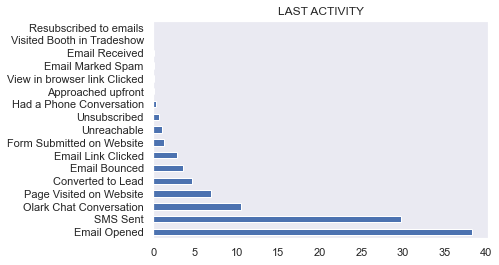

In [39]:
leads['Last Activity'].fillna('Email Opened', inplace=True)
val_count(leads, 'Last Activity')

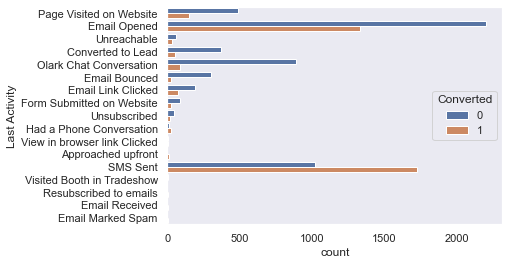

In [40]:
count_plot(leads, 'Last Activity')

Here, SMS Sent has the highest conversion rate and Olark Chat Conversation has the lowest conversion.

#### 2.5.4. Lead Source

Google              31.040000
Direct Traffic      27.520000
Olark Chat          18.990000
Organic Search      12.490000
Reference           5.780000 
Welingak Website    1.540000 
Referral Sites      1.350000 
Facebook            0.600000 
NaN                 0.390000 
bing                0.060000 
google              0.050000 
Click2call          0.040000 
Social Media        0.020000 
Press_Release       0.020000 
Live Chat           0.020000 
blog                0.010000 
testone             0.010000 
NC_EDM              0.010000 
welearnblog_Home    0.010000 
Pay per Click Ads   0.010000 
youtubechannel      0.010000 
WeLearn             0.010000 
Name: Lead Source, dtype: float64


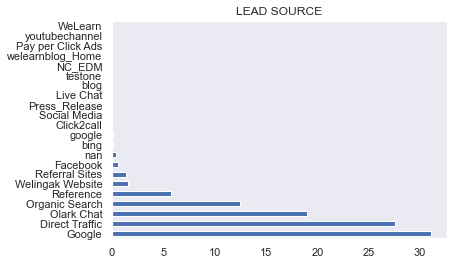

In [41]:
val_count(leads, 'Lead Source')

We'll replace the null values with **Others**.

In [42]:
leads['Lead Source'].replace('google', 'Google', inplace=True)

# Replacing null values with 'Others'
leads['Lead Source'].fillna('Others', inplace=True)

# Combining the sources with less frequency into other_sources
other_sources = leads['Lead Source'].value_counts().index[8:]
print(other_sources)

Index(['Others', 'bing', 'Click2call', 'Press_Release', 'Live Chat',
       'Social Media', 'testone', 'blog', 'NC_EDM', 'Pay per Click Ads',
       'welearnblog_Home', 'youtubechannel', 'WeLearn'],
      dtype='object')


Google             31.090000
Direct Traffic     27.520000
Olark Chat         18.990000
Organic Search     12.490000
Reference          5.780000 
Welingak Website   1.540000 
Referral Sites     1.350000 
Others             0.640000 
Facebook           0.600000 
Name: Lead Source, dtype: float64


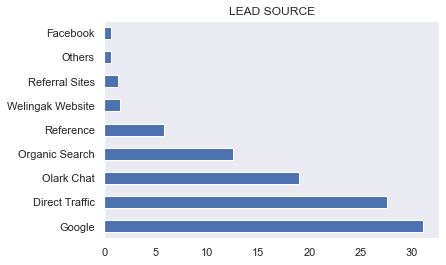

In [43]:
leads['Lead Source'].replace(other_sources, 'Others', inplace=True)
val_count(leads, 'Lead Source')

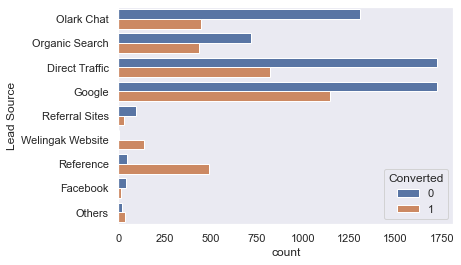

In [44]:
count_plot(leads, 'Lead Source')

Reference and Welingak Website has the highest conversion rate and Olark Chat has the lowest conversion rate.

### 2.6. Other Categorical Columns
#### 2.6.1. Lead Origin

Landing Page Submission   52.880000
API                       38.740000
Lead Add Form             7.770000 
Lead Import               0.600000 
Quick Add Form            0.010000 
Name: Lead Origin, dtype: float64


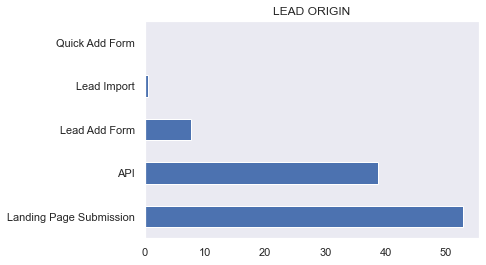

In [45]:
val_count(leads, 'Lead Origin')

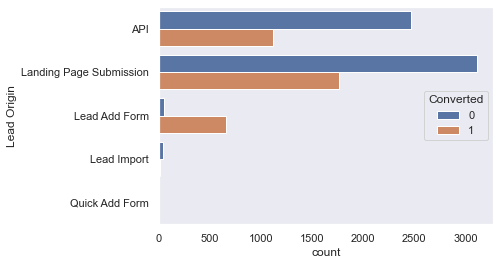

In [46]:
count_plot(leads, 'Lead Origin')

Lead Add Form has the highest conversion rate.

#### 2.6.2. Last Notable Activity

Modified                       36.870000
Email Opened                   30.600000
SMS Sent                       23.510000
Page Visited on Website        3.440000 
Olark Chat Conversation        1.980000 
Email Link Clicked             1.870000 
Email Bounced                  0.650000 
Unsubscribed                   0.510000 
Unreachable                    0.350000 
Had a Phone Conversation       0.150000 
Email Marked Spam              0.020000 
Form Submitted on Website      0.010000 
Approached upfront             0.010000 
View in browser link Clicked   0.010000 
Resubscribed to emails         0.010000 
Email Received                 0.010000 
Name: Last Notable Activity, dtype: float64


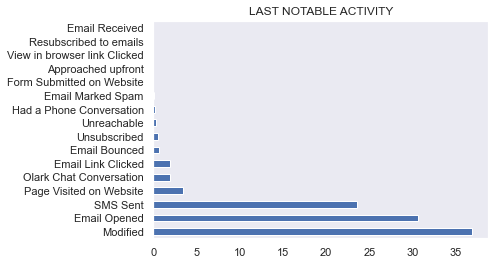

In [47]:
val_count(leads, 'Last Notable Activity')

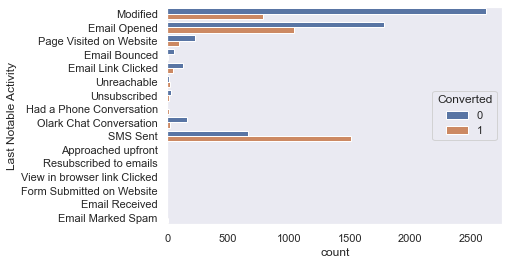

In [48]:
count_plot(leads, 'Last Notable Activity')

SMS Sent has the highest conversion rate.

#### 2.6.3. Converted

0   61.460000
1   38.540000
Name: Converted, dtype: float64


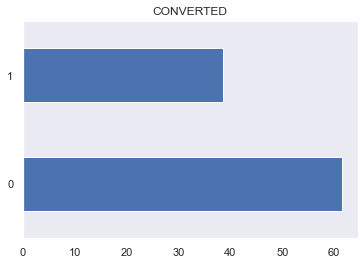

In [49]:
val_count(leads, 'Converted')

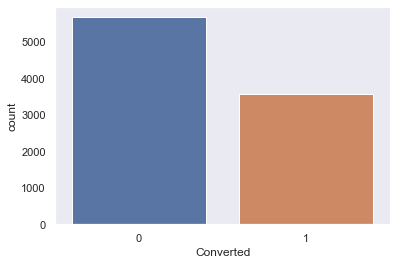

In [50]:
sns.countplot(leads.Converted);

`Converted` is our target variable which has around 38% conversion rate.

In [51]:
leads_attr = df_attr(leads)
leads_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
TotalVisits,9103,137,1.482700,41,float64
Page Views Per Visit,9103,137,1.482700,114,float64
Lead Origin,9240,0,0.000000,5,object
Lead Source,9240,0,0.000000,9,object
Converted,9240,0,0.000000,2,int64
Total Time Spent on Website,9240,0,0.000000,1731,int64
Last Activity,9240,0,0.000000,17,object
Specialization,9240,0,0.000000,10,object
What is your current occupation,9240,0,0.000000,6,object
A free copy of Mastering The Interview,9240,0,0.000000,2,object


All the rows have been retained after cleaning the data.

### 2.7. Numerical Columns

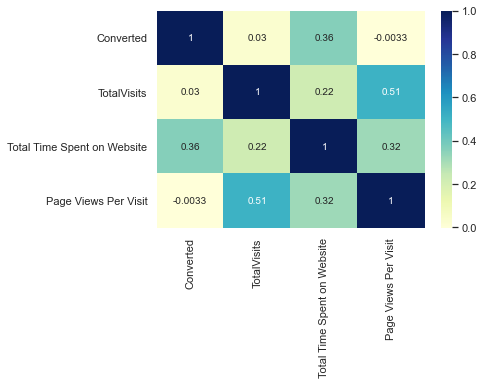

In [52]:
# Plotting the correlation of the numerical variables
sns.heatmap(leads.corr(), cmap='YlGnBu', annot=True)
plt.show()

- `Page Views Per Visit` and `TotalVisits` are highly correlated.
- `Total Time Spent on Website` has the highest correlation with `Converted`. Hence, it might be helpful in our model.

In [53]:
# Finding the description of the numerical variables
leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].\
    describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000


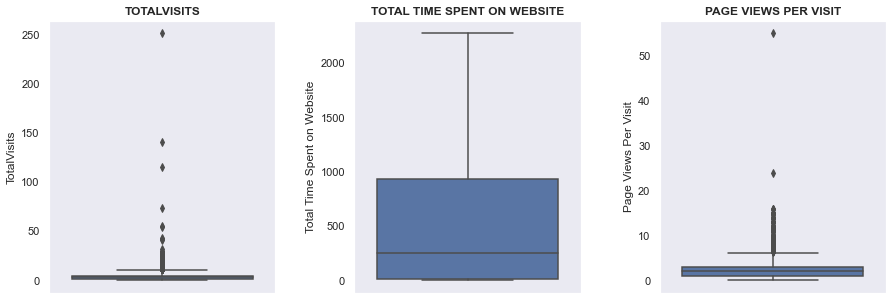

In [54]:
# Plotting the distribution of numberical variables
n_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize = (15, 5))
for i,col in enumerate(n_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=leads[col])
    plt.title(col.upper(), weight='bold')

plt.subplots_adjust(wspace=0.35, hspace = 0.35)    

We have missing values in `TotalVisits` and `Page Views Per Visit` and these columns also have outliers. Hence, we fill the null values with their median values.

#### 2.7.1. Handling missing values

In [55]:
# Filling the missing values in both the columns with their median values
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)

leads[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.438636,2.357440
std,4.819024,2.145781
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


#### 2.7.2. Handling Outliers

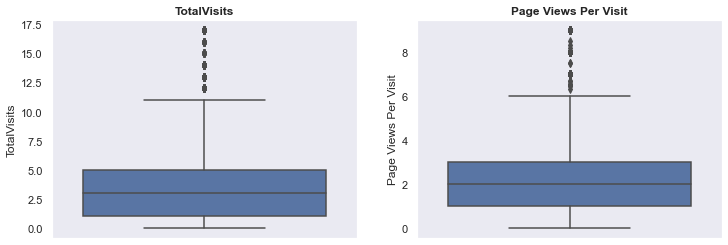

In [56]:
q4 = leads['TotalVisits'].quantile(0.99)

# Capping the outliers of 'TotalVisits' at 99th percentile
leads['TotalVisits'] = np.where(leads['TotalVisits'] >= q4, q4, leads['TotalVisits'])

# Plotting the distribution after treating the outliers
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(y=leads['TotalVisits'])
plt.title('TotalVisits', weight='bold')

q4 = leads['Page Views Per Visit'].quantile(0.99)

# Capping the outliers of 'Page Views Per Visit' at 99th percentile
leads['Page Views Per Visit'] = np.where(leads['Page Views Per Visit'] >= q4, q4, leads['Page Views Per Visit'])

# Plotting the distribution after treating the outliers
plt.subplot(122)
sns.boxplot(y=leads['Page Views Per Visit'])
plt.title('Page Views Per Visit', weight='bold')
plt.show()

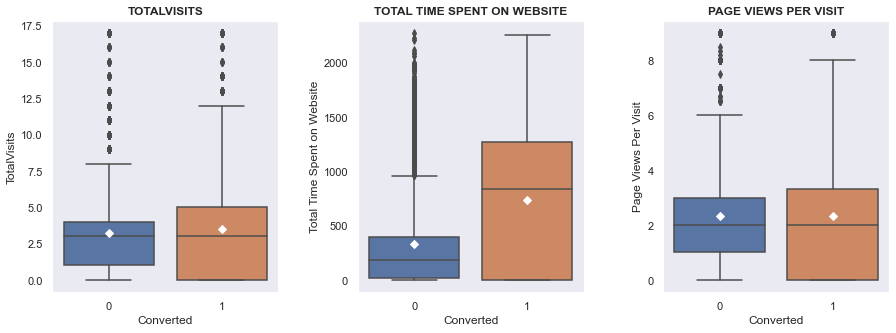

In [57]:
# Comparing the values of numerical variables with that of 'Converted' 
n_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize = (15, 5))
for i,col in enumerate(n_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=leads['Converted'], y=leads[col], showmeans=True, 
                meanprops={'marker':'D', 'markerfacecolor':'w', 'markeredgecolor':'w'})
    plt.title(col.upper(), weight='bold')

plt.subplots_adjust(wspace=0.35, hspace = 0.35)    

- From the plots we can see that the average values of `TotalVisits` and `Page Views Per Visit` remains almost the same for both converted and not converted.
- `Total Time Spent on Website` has a considerable difference for both converted and not converted leads.

In [58]:
# Finding relationship between 'Last Notable Activity' and 'Last Activity'
leads.groupby('Last Notable Activity')['Last Activity'].value_counts()

Last Notable Activity         Last Activity               
Approached upfront            Approached upfront              1   
Email Bounced                 Email Bounced                   60  
Email Link Clicked            Email Link Clicked              173 
Email Marked Spam             Email Marked Spam               2   
Email Opened                  Email Opened                    2827
Email Received                Email Received                  1   
Form Submitted on Website     Form Submitted on Website       1   
Had a Phone Conversation      Had a Phone Conversation        14  
Modified                      Olark Chat Conversation         790 
                              Email Opened                    713 
                              SMS Sent                        573 
                              Converted to Lead               428 
                              Page Visited on Website         322 
                              Email Bounced                   266 
   

`Last Notable Activity` is an intermediate column used by sales team to mark the development of the lead and `Last Activity` is generated once the lead is closed. As we're concerned with the model which can be used before/during the process, we'll remove the `Last Activity` column from our dataset.

In [59]:
# Dropping 'Last Activity' column
leads.drop(['Last Activity'], axis=1, inplace=True)

In [60]:
leads_attr = df_attr(leads)
leads_attr.style.background_gradient(cmap='Reds',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,NUM_UNIQUE,DATATYPE
Lead Origin,9240,0,0.000000,5,object
Lead Source,9240,0,0.000000,9,object
Converted,9240,0,0.000000,2,int64
TotalVisits,9240,0,0.000000,18,float64
Total Time Spent on Website,9240,0,0.000000,1731,int64
Page Views Per Visit,9240,0,0.000000,102,float64
Specialization,9240,0,0.000000,10,object
What is your current occupation,9240,0,0.000000,6,object
A free copy of Mastering The Interview,9240,0,0.000000,2,object
Last Notable Activity,9240,0,0.000000,16,object


## 3. Data Preparation

In [61]:
# Mapping 0 and 1 in place of no and yes
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

leads['A free copy of Mastering The Interview'] = leads[['A free copy of Mastering The Interview']].apply(binary_map)

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Specialization                          9240 non-null   object 
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   int64  
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


### 3.1. Creating Dummies

In [62]:
cols = ['Lead Source', 'Specialization', 'What is your current occupation']

# Creating dummies for 'Lead Source' columns and dropping 'Others' category
d = (pd.get_dummies(leads['Lead Source'], prefix='Lead Source')).drop('Lead Source_Others', axis=1)
df = pd.concat([leads, d], axis=1)

# Creating dummies for 'Specialization' columns and dropping 'Others' category
d = (pd.get_dummies(leads['Specialization'], prefix='Specialization')).drop('Specialization_Others', axis=1)
df = pd.concat([df, d], axis=1)

# Creating dummies for 'What is your current occupation' columns and dropping 'Other' category
d = (pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')).\
    drop('What is your current occupation_Other', axis=1)
df = pd.concat([df, d], axis=1)

# Dropping columns for which we have created dummies
df.drop(cols, axis=1, inplace=True)

# Creating dummies for columns which we did not cover above
obj_cols = df.select_dtypes('object').columns
df = pd.get_dummies(df, columns=obj_cols, drop_first=True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Commerce,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.000000,674,2.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.000000,1532,2.000000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.000000,305,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.000000,1428,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   A free copy of Mastering The Interview                9240 non-null   int64  
 5   Lead Source_Direct Traffic                            9240 non-null   uint8  
 6   Lead Source_Facebook                                  9240 non-null   uint8  
 7   Lead Source_Google                                    9240 non-null   uint8  
 8   Lead Source_Olark Chat                                9240

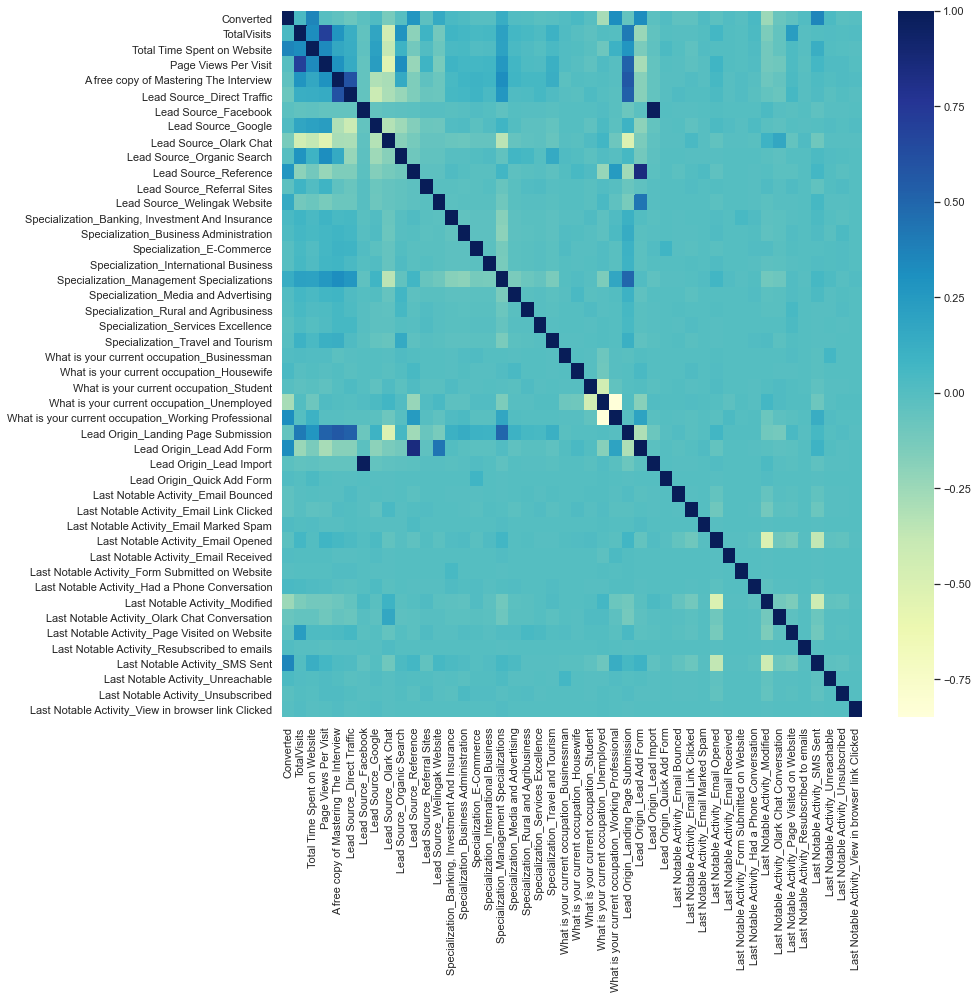

In [64]:
# Finding the correlation of all the variables
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), cmap='YlGnBu');

### 3.2. Train-Test Split

In [65]:
# Splitting the target and predictors from the dataset
y = df.pop('Converted')
X = df

In [66]:
# Splitting data in to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [67]:
# Finding the general data of the train dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6468 non-null   float64
 1   Total Time Spent on Website                           6468 non-null   int64  
 2   Page Views Per Visit                                  6468 non-null   float64
 3   A free copy of Mastering The Interview                6468 non-null   int64  
 4   Lead Source_Direct Traffic                            6468 non-null   uint8  
 5   Lead Source_Facebook                                  6468 non-null   uint8  
 6   Lead Source_Google                                    6468 non-null   uint8  
 7   Lead Source_Olark Chat                                6468 non-null   uint8  
 8   Lead Source_Organic Search                            6

### 3.3. Rescaling

In [68]:
# Initialising the StandardScaler
scaler = StandardScaler()

In [69]:
# Scaling the continuous numerical columns using fit_transform
ncols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[ncols] = scaler.fit_transform(X_train[ncols])

In [70]:
# Finding the distribution of variables after rescaling
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Commerce,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-0.000000,-0.000000,-0.000000,0.311843,0.271490,0.005102,0.316636,0.190167,0.121058,0.060297,0.014224,0.014069,0.035096,0.043599,0.018707,0.018707,0.462430,0.020563,0.007267,0.004793,0.021336,0.000928,0.001391,0.021027,0.897805,0.077613,0.528139,0.079468,0.005102,0.000155,0.006184,0.018398,0.000155,0.305349,0.000155,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.000000
std,1.000077,1.000077,1.000077,0.463282,0.444763,0.071252,0.465200,0.392463,0.326219,0.238054,0.118422,0.117786,0.184036,0.204218,0.135500,0.135500,0.498625,0.141926,0.084940,0.069069,0.144512,0.030445,0.037279,0.143484,0.302929,0.267582,0.499246,0.270489,0.071252,0.012434,0.078403,0.134397,0.012434,0.460591,0.012434,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.000000
min,-1.022595,-0.885371,-1.180474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.715603,-0.863414,-0.671380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.101619,-0.435253,-0.162287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.

## 4. Model Building
### RFE

In [71]:
# Initialising the LogisticRegression from sklearn
logreg = LogisticRegression()

# Initialising and fitting the RFE for 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [72]:
# Finding the result of RFE
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False])

In [73]:
# Comparing the RFE results with the column names
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 24),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Commerce', True, 1),
 ('Specialization_International Business', False, 10),
 ('Specialization_Management Specializations', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Services Excellence', False, 9),
 ('Specialization_Travel and Tourism', False, 2),
 ('What is your current occupa

In [74]:
# Finding the columns which are selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Commerce',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [75]:
# Finding the columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Specialization_International Business',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Businessman',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last No

In [76]:
# Defining function to find Variance Inflation Factors of the predictors
def vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [77]:
# Subsetting the train data with the columns selected by RFE
X_train_1 = X_train[rfe_cols]

X_train_sm = sm.add_constant(X_train_1)
logr1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr1.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.6
Date:                Mon, 20 Jul 2020   Deviance:                       5567.2
Time:                        00:17:13   Pearson chi2:                 7.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `What is your current occupation_Housewife` has the highest p-value. So we will drop it.

### Model 2 

In [78]:
X_train_2 = X_train_1.drop(['What is your current occupation_Housewife'], axis=1)

X_train_sm = sm.add_constant(X_train_2)
logr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr2.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_2))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2791.3
Date:                Mon, 20 Jul 2020   Deviance:                       5582.6
Time:                        00:17:14   Pearson chi2:                 7.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, VIF of `Lead Origin_Landing Page Submission` is higher than our cutoff of 2. Hence, we'll drop that.

### Model 3

In [79]:
X_train_3 = X_train_2.drop(['Lead Origin_Landing Page Submission'], axis=1)

X_train_sm = sm.add_constant(X_train_3)
logr3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr3.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.4
Date:                Mon, 20 Jul 2020   Deviance:                       5718.8
Time:                        00:17:14   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `Specialization_Business Administration` has the highest p-value. Hence, we'll drop that.

### Model 4

In [80]:
X_train_4 = X_train_3.drop(['Specialization_Business Administration'], axis=1)

X_train_sm = sm.add_constant(X_train_4)
logr4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr4.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_4))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.4
Date:                Mon, 20 Jul 2020   Deviance:                       5718.8
Time:                        00:17:15   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `Specialization_E-Commerce` has p-value much greater than 0.05. Hence, we'll drop that.

### Model 5

In [81]:
X_train_5 = X_train_4.drop(['Specialization_E-Commerce'], axis=1)

X_train_sm = sm.add_constant(X_train_5)
logr5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr5.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_5))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.4
Date:                Mon, 20 Jul 2020   Deviance:                       5718.9
Time:                        00:17:15   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `Specialization_Media and Advertising` has the highest p-value. Hence, we'll drop that.

### Model 6

In [82]:
X_train_6 = X_train_5.drop(['Specialization_Media and Advertising'], axis=1)

X_train_sm = sm.add_constant(X_train_6)
logr6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr6.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_6))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.7
Date:                Mon, 20 Jul 2020   Deviance:                       5719.4
Time:                        00:17:16   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `Specialization_Management Specializations` has the highest p-value. Hence, we'll drop that.

### Model 7

In [83]:
X_train_7 = X_train_6.drop(['Specialization_Management Specializations'], axis=1)

X_train_sm = sm.add_constant(X_train_7)
logr7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr7.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_7))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.3
Date:                Mon, 20 Jul 2020   Deviance:                       5720.6
Time:                        00:17:16   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `Specialization_Banking, Investment And Insurance` has the highest p-value. Hence, we'll drop that.

### Model 8

In [84]:
X_train_8 = X_train_7.drop(['Specialization_Banking, Investment And Insurance'], axis=1)

X_train_sm = sm.add_constant(X_train_8)
logr8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr8.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_8))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.3
Date:                Mon, 20 Jul 2020   Deviance:                       5722.6
Time:                        00:17:16   Pearson chi2:                 7.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `Specialization_Rural and Agribusiness` has the p-value > 0.05. Hence, we'll drop that.

### Model 9

In [85]:
X_train_9 = X_train_8.drop(['Specialization_Rural and Agribusiness'], axis=1)

X_train_sm = sm.add_constant(X_train_9)
logr9 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr9.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_9))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Mon, 20 Jul 2020   Deviance:                       5725.6
Time:                        00:17:16   Pearson chi2:                 7.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

This will be our final model as p-values of all the columns are less than 0.05 and VIF < 2. 

### Model Metrics

In [86]:
# Predicting the Converted probabilities using our final model
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09511345, 0.19677783, 0.11219042, 0.8184868 , 0.09511345,
       0.99147626, 0.10860714, 0.98966303, 0.30224246, 0.88941018])

In [87]:
# Creating a dataframe consisting of actual converted and converted probabilites
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.095113,1871
1,0,0.196778,6795
2,0,0.112190,3516
3,0,0.818487,8105
4,0,0.095113,3934


In [88]:
# Predicting the 'Converted' using the probabilities having 0.5 as the threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.095113,1871,0
1,0,0.196778,6795,0
2,0,0.112190,3516,0
3,0,0.818487,8105,1
4,0,0.095113,3934,0


In [89]:
# Finding the confusion matrix for our prediction
cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(cm)

[[3559  443]
 [ 901 1565]]


In [90]:
# Defining a function to print important metrics of our model
def model_metrics(cm):
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]

    print('Accuracy: %.6f' %((TP+TN)/(TP+FP+TN+FN)))
    print('Sensitivity: %.6f' %(TP/(TP+FN)))
    print('Specificity: %.6f' %(TN/(TN+FP)))
    print('False Positive Rate: %.6f' %(FP/(TN+FP)))
    print('Positive Predictive Value: %.6f' %(TP/(TP+FP)))
    print('Negative Predictive Value: %.6f' %(TN/(TN+FN)))
    
model_metrics(cm)

Accuracy: 0.792208
Sensitivity: 0.634631
Specificity: 0.889305
False Positive Rate: 0.110695
Positive Predictive Value: 0.779382
Negative Predictive Value: 0.797982


### Plotting the ROC curve

In [91]:
# Defining function to plot ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

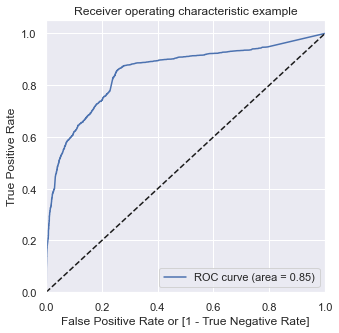

In [92]:
# Plotting the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate=False)

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding the optimal threshold

In [93]:
# Predicting the conversion for various threshold rates
n = [float(x)/10 for x in range(10)]

for i in n:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.095113,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.196778,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.112190,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.818487,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.095113,3934,0,1,0,0,0,0,0,0,0,0,0


In [94]:
# Creating a dataframe with accuracy, sensitivity and specificity and their corresponding threshold values
cutoff_df = pd.DataFrame(columns = ['prob','accu','sensi','speci'])
n = [float(x)/10 for x in range(10)]

for i in n:
    cmi = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total = sum(sum(cmi))
    accu = (cmi[0,0]+cmi[1,1])/total
    speci = cmi[0,0]/(cmi[0,0]+cmi[0,1])
    sensi = cmi[1,1]/(cmi[1,0]+cmi[1,1])
    cutoff_df.loc[i] = [i, accu, sensi, speci]

cutoff_df

,prob,accu,sensi,speci
0.000000,0.000000,0.381262,1.000000,0.000000
0.100000,0.100000,0.511596,0.941200,0.246877
0.200000,0.200000,0.770254,0.877940,0.703898
0.300000,0.300000,0.786797,0.847526,0.749375
0.400000,0.400000,0.782158,0.728710,0.815092
0.500000,0.500000,0.792208,0.634631,0.889305
0.600000,0.600000,0.791899,0.564882,0.931784
0.700000,0.700000,0.780303,0.495134,0.956022
0.800000,0.800000,0.747526,0.373885,0.977761
0.900000,0.900000,0.712121,0.261152,0.990005


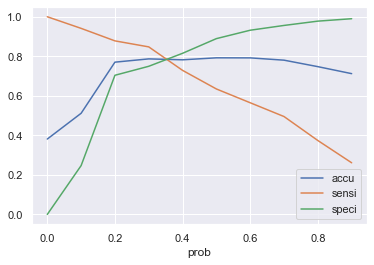

In [95]:
# Plotting to find the optimal cutoff point
cutoff_df.plot.line(x='prob', y=['accu','sensi','speci']);
plt.grid()

We'll take our optimal cutoff point as **0.3**, as that's the value where all the above parameters coincide.

In [96]:
# Predicting the 'Converted' using 0.3 as the threshold value
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.095113,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.196778,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.112190,3516,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.818487,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.095113,3934,0,1,0,0,0,0,0,0,0,0,0,0


#### Lead Score
Here, we calculate the lead score by multiplying the `Converted_prob` by 100.

In [97]:
# Calculating the 'Lead_Score'
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.095113,1871,0,10
1,0,0.196778,6795,0,20
2,0,0.112190,3516,0,11
3,0,0.818487,8105,1,82
4,0,0.095113,3934,0,10


In [98]:
# Finding the confusion matrix for the new prediction
cm2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
cm2

array([[2999, 1003],
       [ 376, 2090]], dtype=int64)

In [99]:
# Finding the model metrics of new prediction
model_metrics(cm2)

Accuracy: 0.786797
Sensitivity: 0.847526
Specificity: 0.749375
False Positive Rate: 0.250625
Positive Predictive Value: 0.675719
Negative Predictive Value: 0.888593


In [100]:
# Finding the precision and recall of the prediction
print('Precision: %.6f' %(metrics.precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)))
print('Recall: %.6f' %(metrics.recall_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)))

Precision: 0.675719
Recall: 0.847526


## 5. Model Evaluation
### Making predictions on the test dataset

In [101]:
# Scaling the continuous numerical columns in the test set using 'transform'
ncols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[ncols] = scaler.transform(X_test[ncols])
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Commerce,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,-0.003275,0.023314,0.017435,0.314214,0.283911,0.007937,0.297619,0.189394,0.133838,0.051948,0.011905,0.018398,0.040043,0.043651,0.017316,0.020563,0.455267,0.025253,0.009380,0.003247,0.023449,0.000722,0.000361,0.026696,0.895743,0.073593,0.530303,0.073593,0.007937,0.000000,0.007215,0.019481,0.000361,0.307359,0.000000,0.000000,0.001082,0.370851,0.022727,0.031025,0.000000,0.229437,0.003968,0.005772,0.000361
std,0.970050,1.008922,1.011850,0.464286,0.450975,0.088749,0.457294,0.391892,0.340540,0.221962,0.108477,0.134411,0.196096,0.204354,0.130470,0.141941,0.498085,0.156919,0.096410,0.056898,0.151351,0.026856,0.018993,0.161221,0.305649,0.261155,0.499171,0.261155,0.088749,0.000000,0.084649,0.138231,0.018993,0.461483,0.000000,0.000000,0.032886,0.483120,0.149060,0.173415,0.000000,0.420547,0.062880,0.075768,0.018993
min,-1.022595,-0.885371,-1.180474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.715603,-0.861584,-0.671380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.101619,-0.413296,-0.162287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00

In [102]:
# Subsetting the X_test with the columns in our final model
X_test = X_test[X_train_9.columns]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,What is your current occupation_Working Professional,Lead Origin_Lead Add Form,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,1,0
2376,-0.885371,0,0,1,0,1,0
7766,-0.777416,0,1,0,0,0,1
9199,-0.885371,0,0,0,0,0,0
4359,-0.885371,0,0,1,0,0,0


In [103]:
# Adding the constant to the test data
X_test_sm = sm.add_constant(X_test)

# Predicting the test data using our final model
y_test_pred = res.predict(X_test_sm)

In [104]:
# Creating a dataframe with conversion probabilities
y_pred = pd.DataFrame(y_test_pred)
y_pred.reset_index(drop=True, inplace=True)
y_pred.head()

,0
0,0.755027
1,0.943386
2,0.922266
3,0.095113
4,0.767016


In [105]:
# Creating dataframe with 'Prospect ID'
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.reset_index(drop=True, inplace=True)

# Combining the above dataframes with test predictions
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)
y_pred_final.rename(columns={0:'Converted_prob'}, inplace=True)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.755027
1,1,2376,0.943386
2,1,7766,0.922266
3,0,9199,0.095113
4,1,4359,0.767016


In [106]:
# Prediciting the conversion using 0.3 as our threshold value as in our train data
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

# Calculating the lead score for the test predictions
y_pred_final['Lead_Score'] = y_pred_final['Converted_prob'].map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_Predicted,Lead_Score
0,1,4269,0.755027,1,76
1,1,2376,0.943386,1,94
2,1,7766,0.922266,1,92
3,0,9199,0.095113,0,10
4,1,4359,0.767016,1,77


In [107]:
# Finding the confusion matrix for test predictions
cm_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
print(cm_test)

[[1274  403]
 [ 163  932]]


In [108]:
# Finding the model metrics for test predictions
model_metrics(cm_test)

Accuracy: 0.795815
Sensitivity: 0.851142
Specificity: 0.759690
False Positive Rate: 0.240310
Positive Predictive Value: 0.698127
Negative Predictive Value: 0.886569


In [109]:
# Finding the precision and recall of the test predictions
print('Precision: %.6f'%(metrics.precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)))
print('Recall: %.6f'%(metrics.recall_score(y_pred_final.Converted , y_pred_final.final_Predicted)))

Precision: 0.698127
Recall: 0.851142


- The model metrics are almost similar for both train and test datasets that shows the model is performing well.
- Our model has a sensitivity of around 0.85 which shows it is able to correctly predict 85% of the converted leads.
- The precision of our model is around 0.7 which shows that the 70% of the leads predicted by the model are truly converted leads.

**Hence, this model will be helpful for the X education to increase their conversion rates.**

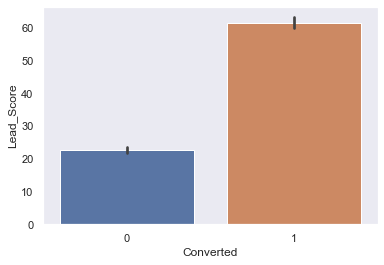

In [110]:
# Comparing the average values of conversion of the lead scores for converted and not converted
sns.barplot(data=y_pred_final, y='Lead_Score', x='Converted');

From the above plot, we can see that the average `Lead_Score` of the converted is around 60 and that of not converted is around 20. So, the sales team can focus on leads with `Lead_score` of around 60 to improve their conversion rate.